# COMP S493F Lab 8

In [1]:
%env TF_CPP_MIN_LOG_LEVEL=2
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

env: TF_CPP_MIN_LOG_LEVEL=2


In this lesson, you'll work on:

- exploring structures and components of CNNs, and
- application of batch normalization and dropout to CNNs.

### Student name: *LO TSZ KIN*

# Utility code

This section contains some utility functions for use in the rest of the lesson.

This function loads the MNIST dataset, prepares the data, and returns portion of the data in a 4-tuple: `X_train`, `y_train`, `X_test`, `y_test`. Note that the input feature arrays `X_train` and `X_test` are reshaped to 4D, i.e. each input feature example reshaped to 3D.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

def load_and_prep_mnist(ratio=0.1):
    keras.utils.set_random_seed(42)
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    if ratio < 1:
        sz_train = int(len(X_train) * ratio)
        sz_test = int(len(X_test) * ratio)
        X_train, y_train = X_train[:sz_train], y_train[:sz_train]
        X_test, y_test = X_test[:sz_test], y_test[:sz_test]
    X_train_out = X_train.astype(float) / 255  # scale to range 0 to 1
    X_test_out = X_test.astype(float) / 255
    X_train_out = X_train_out.reshape(-1, 28, 28, 1)  # convert 2D to 3D
    X_test_out = X_test_out.reshape(-1, 28, 28, 1)
    y_train_oh = keras.utils.to_categorical(y_train, 10)  # one-hot encode
    y_test_oh = keras.utils.to_categorical(y_test, 10)
    return X_train_out, y_train_oh, X_test_out, y_test_oh

This function retrieves the final results in a training history, i.e. values of "loss", "val_loss", "acc", and "val_acc" in the final epoch.

In [3]:
def history_final_values(history):
    return {k: round(v[-1], 4) for k, v in history.history.items()}

This function plots a training history, including both training and validation results.

In [4]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(history.history["acc"], label="acc")
    plt.plot(history.history["val_acc"], label="val_acc")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

This function compiles and fits a model, and returns the training history.

In [5]:
def compile_and_fit_model(model, X_train, y_train, X_test, y_test,
                          epochs=20, batch_size=256, verbose=0):
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam", metrics=["acc"])
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, verbose=verbose,
                        validation_data=(X_test, y_test))
    return history

# Convolutional layers and kernels

In CNNs, patterns in images are identified by convolutional layers of kernels. The number of convolutional layers and the number of kernels in a convolutional layer are two key factors of a CNN's capability and complexity.

Three CNN models for classifying the MNIST digit dataset are examined next. All of them have 1 convolutional layer, but they have different numbers of kernels in a layer -- 16, 32, and 64 3&times;3 kernels, respectively. The summary of results, code and execution outputs are shown below.

Model | Conv layers | Kernels in a conv layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#1A | 1 | 16 | 0.1769 | 0.9500 | No
#1B | 1 | 32 | 0.1965 | 0.9500 | No
#1C | 1 | 64 | 0.1852 | 0.9500 | Slight

{'loss': 0.0101, 'acc': 0.9998, 'val_loss': 0.1769, 'val_acc': 0.95}


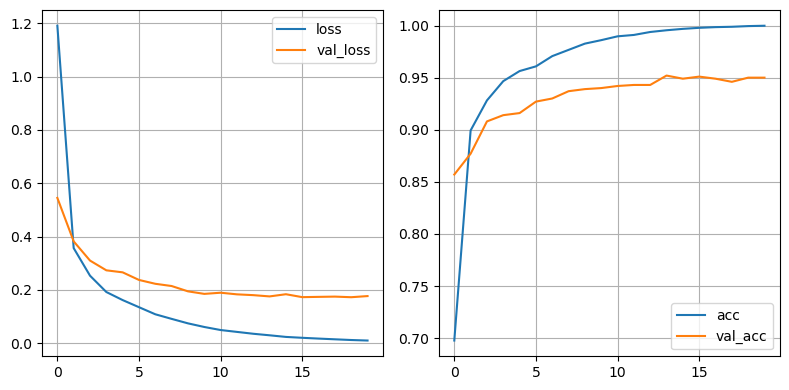

In [ ]:
# Model#1A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0073, 'acc': 0.9997, 'val_loss': 0.1965, 'val_acc': 0.95}


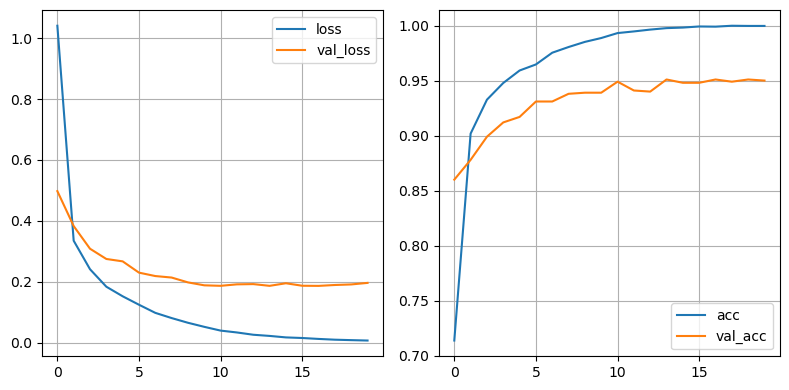

In [ ]:
# Model#1B
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0034, 'acc': 1.0, 'val_loss': 0.1852, 'val_acc': 0.95}


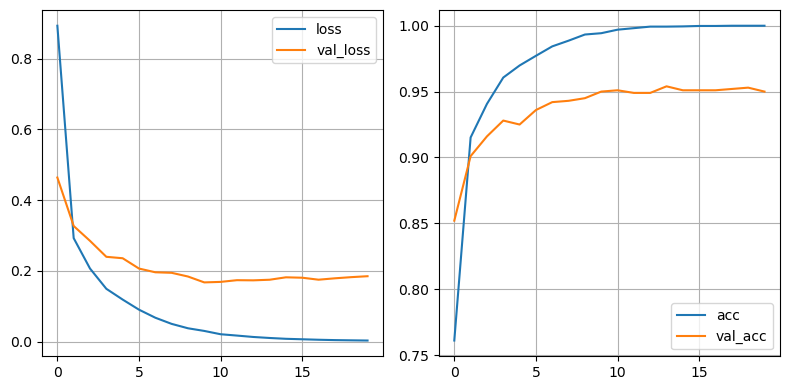

In [ ]:
# Model#1C
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

# Practice - Question 1 of 3

In this section, we examine CNNs with 2 convolutional layers.

## Q1a

Modify the code of Model#1A/1B/1C to use 2 convolutional layers each:

- Model#2A: 2 convolutional layers, each containing 16 3&times;3 kernels
- Model#2B: 2 convolutional layers, each containing 32 3&times;3 kernels
- Model#2C: 2 convolutional layers, each containing 64 3&times;3 kernels

11490434/11490434 [==============================] - 2s 0us/step
{'loss': 0.0036, 'acc': 1.0, 'val_loss': 0.1618, 'val_acc': 0.954}


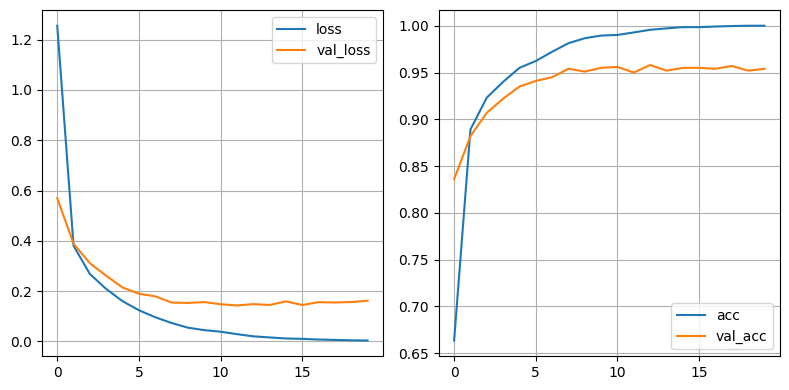

In [6]:
# Model#2A

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

{'loss': 0.0011, 'acc': 1.0, 'val_loss': 0.1719, 'val_acc': 0.957}


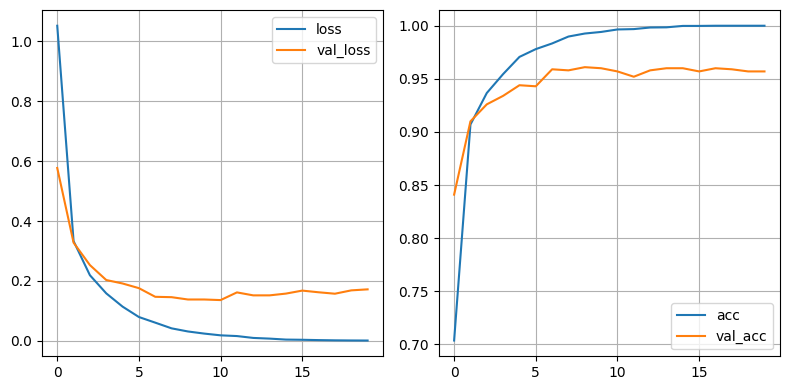

In [7]:
# Model#2B

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)


{'loss': 0.0003, 'acc': 1.0, 'val_loss': 0.1822, 'val_acc': 0.958}


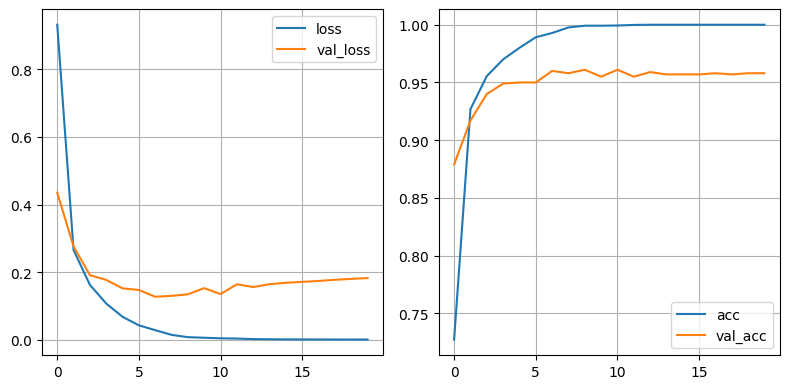

In [8]:
# Model#2C

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

## Q1b

A template table is provided below.

Model | Conv layers | Kernels in a conv layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#2A | 2 | 16 | ? | ? | ?
#2B | 2 | 32 | ? | ? | ?
#2C | 2 | 64 | ? | ? | ?

Make a copy of the table. Referring to the execution outputs, fill in the validation results and overfitting status in the table.

Solution:


Model | Conv layers | Kernels in a conv layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#2A | 2 | 16 | 0.1618 | 0.954 | NO
#2B | 2 | 32 | 0.1719 | 0.957 | slight
#2C | 2 | 64 | 0.1822 | 0.958 | Moderate


## Q1c

The following summary of Model#2C shows the output shapes and numbers of trainable parameters of the model's layers. The input layer, which contains placeholders for input data and performs no operations, is not shown in the summary; it has an input shape of (None, 28, 28, 1), which means a batch of 28&times;28 1-channel (i.e. grayscale) images.

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                1179680   
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 1217578 (4.64 MB)
Trainable params: 1217578 (4.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Consider the first convolutional layer of 64 3&times;3 kernels. In the output shape, the width/height can be calculated as: input size 28 - kernel size 3 + 1 = 26; the depth is 64 (i.e. number of kernels). The number of trainable parameters can be calculated as: 64 kernels &times; (kernel size 3&times;3 &times; input depth 1 + 1 bias) = 640.

The number of trainable parameters of the second convolutional layer is 36,928. Explain this number by writing an expression for calculating it, and describing the key terms in the expression. Write your answer in a text cell below.

Solution:

Number of trainable parameters = Number of kernels × (Kernel size × Kernel size × Input depth + 1)

= 64 × (3 × 3 × 1 + 1) = 36928

## &#x2766;

Model#2C, which has 2 convolutional layers and 64 3&times;3 kernels in each convolutional layer, is a capable model but has overfitting. Let's try to overcome its overfitting using some regularization techniques.

# Batch normalization

Batch normalization improves training of neural networks in several ways, such as reducing overfitting. The following Model#3A adds two batch norm layers to Model#2C, i.e. one batch norm layer after each convolutional layer. The validation results are not good, however.

{'loss': 0.0006, 'acc': 0.9998, 'val_loss': 0.9965, 'val_acc': 0.667}


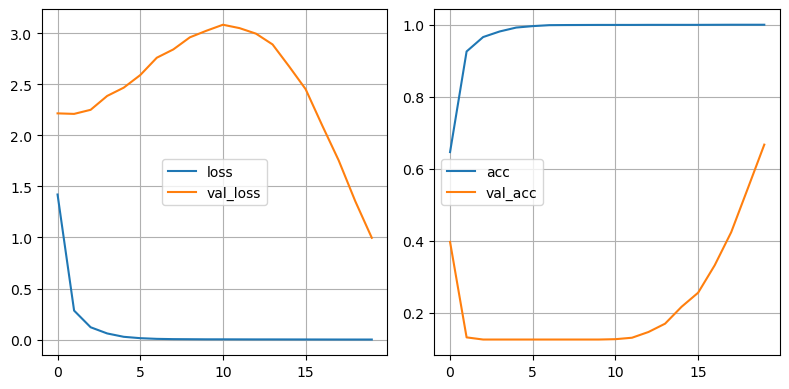

In [ ]:
# Model#3A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

# Practice - Question 2 of 3

In this section, we add batch normalization in different ways and see if one way is better than the others.

## Q2a

Add one batch norm layer to Model#2C as follows:

- Model#3B: add one batch norm layer after the first convolutional layer
- Model#3C: add one batch norm layer after the second convolutional layer

{'loss': 0.139, 'acc': 0.9323, 'val_loss': 0.499, 'val_acc': 0.901}


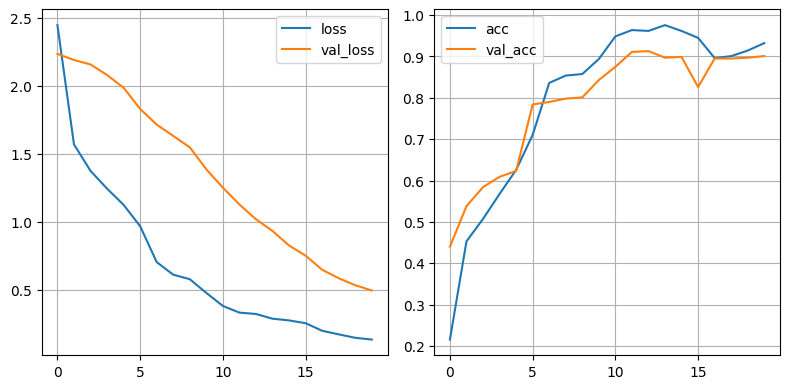

In [10]:
# Model#3B

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)


{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.1188, 'val_acc': 0.963}


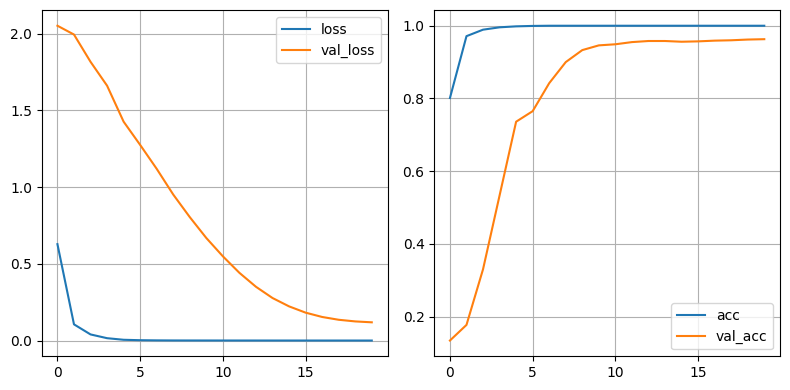

In [11]:
# Model#3C

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

## Q2b

A template table is provided below.

Model | Conv & BN layers | Kernels in a conv layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#3A | Conv + BN + Conv + BN | 64 | 0.9965 | 0.6670 | No
#3B | Conv + BN + Conv | 64 | ? | ? | ?
#3C | Conv + Conv + BN | 64 | ? | ? | ?

Make a copy of the table. Referring to the execution outputs, fill in the validation results and overfitting status in the table.

Solution:

Model | Conv & BN layers | Kernels in a conv layer | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:
#3A | Conv + BN + Conv + BN | 64 | 0.9965 | 0.6670 | No
#3B | Conv + BN + Conv | 64 | 0.499 | 0.901 | NO
#3C | Conv + Conv + BN | 64 | 0.1188 | 0.963 | No


## &#x2766;

We should find that Model#3C performs the best. In general, batch norm works well after, rather than within, a bunch of convolutional layers.

# Dropout

Dropout is another regularization technique to mitigate overfitting. The following Model#4A applies dropout of rate 0.25 after each of the two convolutional layers. The validation results are quite good.

{'loss': 0.0008, 'acc': 1.0, 'val_loss': 0.1665, 'val_acc': 0.965}


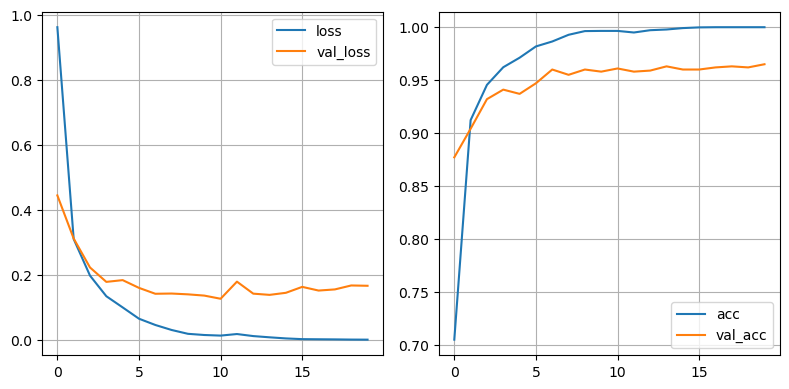

In [ ]:
# Model#4A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

# Practice - Question 3 of 3

## Q3a

Modify Model#4A to use dropout of rate 0.5 (instead of 0.25):

- Model#4B: dropout of rate 0.5 after each of the two convolutional layers

{'loss': 0.0076, 'acc': 0.9982, 'val_loss': 0.1454, 'val_acc': 0.962}


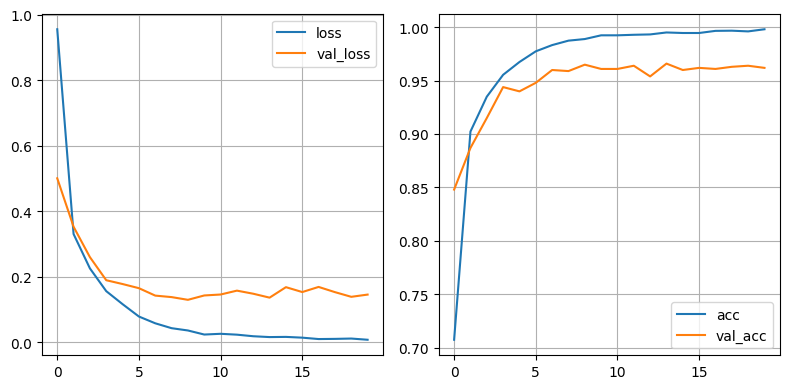

In [12]:
# Model#4B

X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

## Q3b

A template table is provided below.

Model | Conv layers | Kernels in a conv layer | Dropout rate | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:|:-:
#4A | 2 | 64 | 0.25 | 0.1665 | 0.9650 | Slight
#4B | 2 | 64 | 0.5 | ? | ? | ?

Make a copy of the table. Referring to the execution outputs, fill in the validation results and overfitting status in the table.

Solution:

Model | Conv layers | Kernels in a conv layer | Dropout rate | Val Loss | Val Accuracy | Overfitting
:-:|:-:|:-:|:-:|:-:|:-:|:-:
#4A | 2 | 64 | 0.25 | 0.1665 | 0.9650 | Slight
#4B | 2 | 64 | 0.5 | 0.1454 | 0.962 | Slight

## &#x2766;

Using a higher dropout rate (0.5 versus 0.25) has slightly better results according to the validation loss. More dropout leads to stronger regularization and thus less overfitting.

# Extras

The previous models contain either 1 or 2 convolutional layers. In this section, we examine models containing 3 convolutional layers and see if they have better results.

The following Model#5A is similar to Model#2C but has 3 convolutional layers (instead of 2). Compared to Model#2C (val_loss: 0.1677, val_acc: 0.9570), Model#5A has higher loss and higher accuracy. The higher loss may be caused by overfitting.

{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.175, 'val_acc': 0.968}


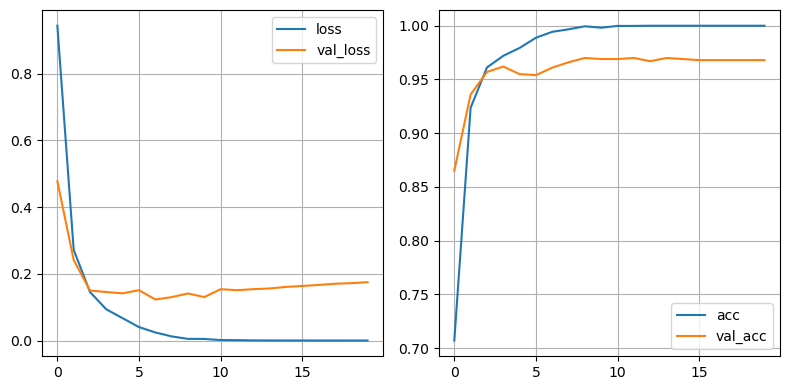

In [ ]:
# Model#5A
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

### E1a

Create Model#5B by modifying Model#3C to have 3 convolutional layers (instead of 2). That is, there are 3 convolutional layers followed by a batch norm layer. Compare the validation results of this model to those of Model#3C.

### E1b

Create Model#5C by modifying Model#4B to have 3 convolutional layers (instead of 2). Each convolutional layer is followed by dropout of rate 0.5. Compare the validation results of this model to those of Model#4B.

## Solutions to extra exercises

### E1a

The code and execution output of Model#5B are shown below. Compared to Model#3C (val_loss: 0.1205, val_acc: 0.9650), the loss is lower and the accuracy is higher. In other words, this model has better performance.

{'loss': 0.0001, 'acc': 1.0, 'val_loss': 0.1129, 'val_acc': 0.968}


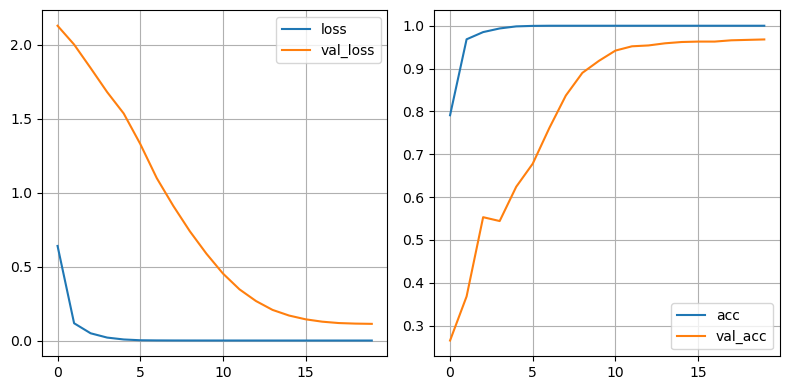

In [ ]:
# Solution

# Model#5B
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

### E1b

The code and execution output of Model#5B are shown below. Compared to Model#4B (val_loss: 0.1585, val_acc: 0.9630), the loss is lower and the accuracy is higher. In other words, this model has better performance.

{'loss': 0.0153, 'acc': 0.995, 'val_loss': 0.0991, 'val_acc': 0.97}


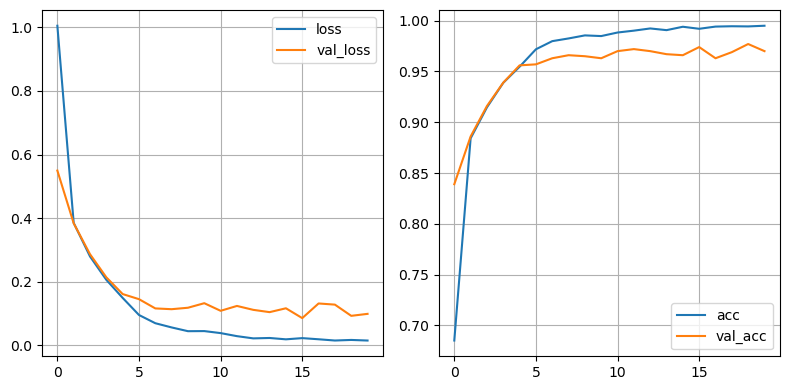

In [ ]:
# Solution

# Model#5C
X_train, y_train, X_test, y_test = load_and_prep_mnist()
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])
history = compile_and_fit_model(model, X_train, y_train, X_test, y_test)
print(history_final_values(history))
plot_history(history)

## &#x2766;